In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [107]:
type(df)

pandas.core.frame.DataFrame

In [108]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [109]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [110]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [111]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [112]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [113]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [114]:
Sex_Salary = df[['salary', 'sex']]
Sex_Salary[Sex_Salary['sex']== 'Female']

,salary,sex
9,129000,Female
19,137000,Female
24,74830,Female
34,80225,Female
35,77000,Female
47,151768,Female
48,140096,Female
52,74692,Female
63,103613,Female
68,111512,Female


In [115]:
Sex_Salary[Sex_Salary['sex']== 'Male']

,salary,sex
0,139750,Male
1,173200,Male
2,79750,Male
3,115000,Male
4,141500,Male
...,...,...
392,103106,Male
393,150564,Male
394,101738,Male
395,95329,Male


In [116]:
Sex_Salary['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

Finding the Median salary for all males

In [117]:
# male Median Salary

MaskMale = Sex_Salary['sex']=='Male'
Sex_Salary[MaskMale].median()

# Sex_Salary[Sex_Salary['sex']== 'Male'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


salary    108043.0
dtype: float64

Finding the Median salary for all females

In [118]:
MaskFemale = Sex_Salary['sex'] == 'Female'
Sex_Salary[MaskFemale].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


salary    103750.0
dtype: float64

Comparing the Mean salary of Males and Females

In [119]:
# male vs female = difference of salary
sub = Sex_Salary[MaskMale].mean() - Sex_Salary[MaskFemale].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [120]:
# The difference between mean salaries of male and female
sub

salary    14088.008738
dtype: float64

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [121]:
experience_years = df['yrs.service']	>= 20

In [122]:
moreThan20 = df[experience_years]['salary'].mean()
moreThan20

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [123]:
# salary of people with less than 20 years of experience

less_experience = df['yrs.service'] <= 20
lessThan20 = df[less_experience]['salary'].mean()
lessThan20

108768.776

In [124]:
salaries = moreThan20 - lessThan20
salaries

13751.880050955413

People who have salary of greater than or equal to 200,000

In [125]:
Hsalary = df['salary'] >= 200000
Nsalary = df[Hsalary]#['salary']
Nsalary


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...


# Rename values, subset columns, etc

In [126]:
df.rename(columns = {'rank': 'Rank', 'discipline': 'Discipline', 'yrs.since.phd': 'Years+PHD', 'sex' : 'Sex', 'salary' : 'Salary', 'yrs.service' : 'Years of Service'}, inplace=True)

In [127]:
df

,Unnamed: 0,Rank,Discipline,Years+PHD,Years of Service,Sex,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

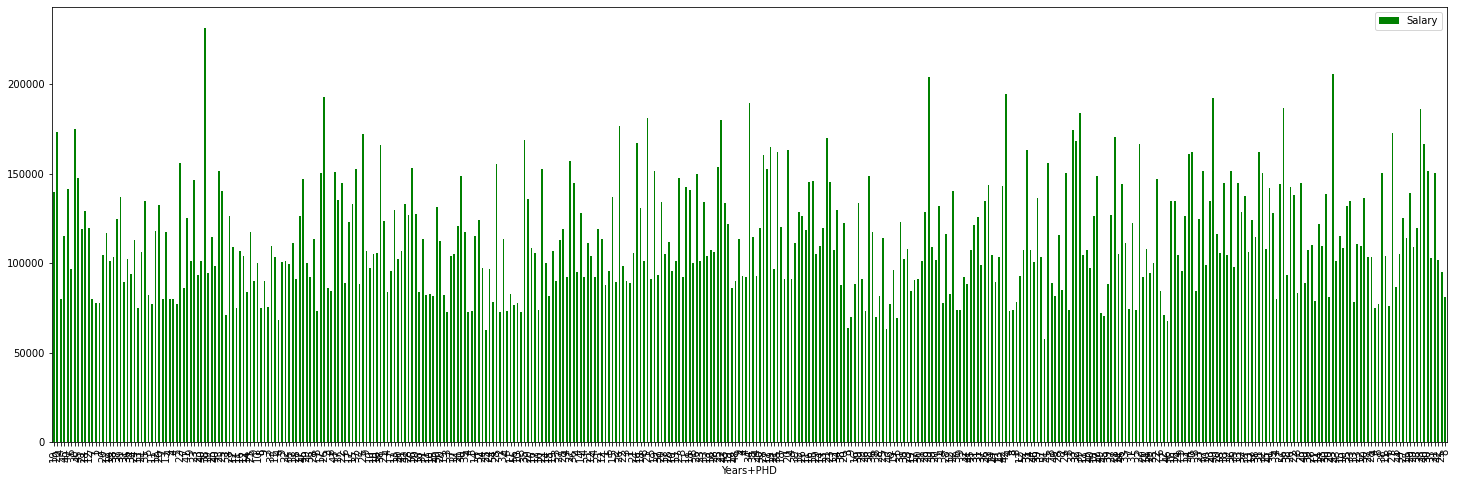

In [128]:
df.plot.bar(x = 'Years+PHD', y = 'Salary', style = 'o', color = 'g', figsize=(25,8));

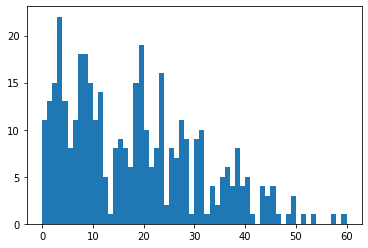

In [129]:
# plt.figure();

# df.plot.hist('Years of Service');

plt.hist(df['Years of Service'], bins = 60);

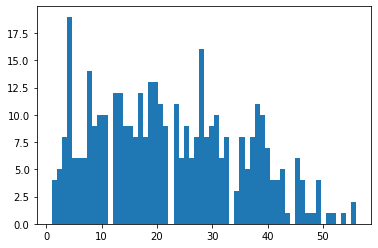

In [130]:
plt.hist(df['Years+PHD'], bins = 60);

In [131]:
df['Years of Service'].value_counts()

3     22
19    19
7     18
8     18
23    16
18    15
9     15
2     15
11    14
4     13
1     13
27    11
0     11
6     11
10    11
31    10
20    10
15     9
30     9
28     9
14     8
5      8
16     8
22     8
25     8
38     8
26     7
36     6
17     6
21     6
12     5
35     5
40     5
33     4
37     4
45     4
43     4
39     4
44     3
49     3
24     2
34     2
53     1
57     1
32     1
29     1
41     1
48     1
46     1
51     1
13     1
60     1
Name: Years of Service, dtype: int64

In [132]:
df['Years+PHD'].value_counts()

4     19
28    16
8     14
19    13
20    13
13    12
12    12
17    12
21    11
23    11
38    11
10    10
39    10
31    10
11    10
14     9
25     9
15     9
22     9
9      9
30     9
3      8
27     8
37     8
29     8
35     8
33     8
16     8
18     8
40     7
32     6
45     6
26     6
24     6
6      6
7      6
5      6
2      5
43     5
36     5
1      4
41     4
42     4
49     4
46     4
34     3
56     2
52     1
51     1
54     1
47     1
48     1
44     1
Name: Years+PHD, dtype: int64

In [133]:
# df = pd.DataFrame({'Salary': [0.330, 4.87 , 5.97],
#                    'Rank': [2439.7, 6051.8, 6378.1]},
#                   index=['Years+PHD', 'Years of Service', 'Sex'])
# plot = df.plot.pie(y='Salary', figsize=(10, 10))

# avaSa = df.groupby(['Years of Service', 'Years+PHD']).Salary.mean()

sexSa = df.groupby(['Sex']).Salary.mean()

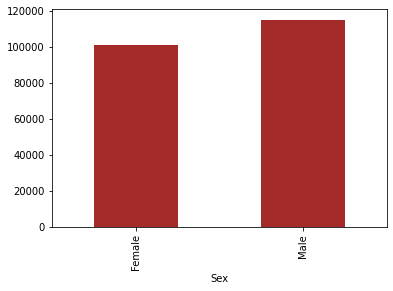

In [134]:
sexSa.plot.bar(x = 'Sex', y = 'Salary', color = 'brown')

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...



I also discovered that the -

 Your Findings here...





In [135]:
# It was possible to see that most of people have 3 years of service, and only one person have 60 years of service.
# It was possible to conclude that men have higher salaries than women.
# There are only three people with salary > than 200000 and they are men.
# All people making more than 200000 have more than 25 years experince + PHD.


#Future work: See if there are women with same years of work + work experience making less money.